# Examen Final de Riesgos Financieros

## Librerías

In [1]:
import yfinance as yf  # Yahoo Finance API for stock data
import pandas as pd  # Data manipulation library
import numpy as np  # Numerical computing library
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from scipy.optimize import minimize  # Optimization algorithms
from scipy.stats import norm  # Normal distribution functions
from pandas_datareader import data as pdr  # Alternative data source API
from datetime import datetime, timedelta  # Date and time manipulation
from scipy.stats import chi2  # Chi-square distribution for statistical tests

## 1. Elección de los Activos

Se lista un conjunto de activos que sean candidatos para armar el portafolio:


- Renta variable USA: ['AAPL', 'MSFT', 'JPM', 'XOM', 'JNJ', 'TSLA','UNH', 'RGC', 'QUBT', 'DFDV', 'QBTS', 'RGTI', 'MNPR', 'DGNX', 'TGEN', 'NNNN',...]

- Renta fija: ['TLT' (bonos largos), 'IEF' (bonos 7–10Y), 'SHY' (bonos cortos)]

- Commodities y refugios: ['GLD' (oro), 'SLV' (plata), 'DBC' (mixto)]

- Internacional/mercados emergentes: ['VEA' (desarrollados), 'VWO' (emergentes)]

- Alternativos o defensivos: ['XLU' (utilities), 'XLP' (consumo básico)]

- Mercado FX: ['USD/EUR', 'USD/JPY', 'USD/PEN']


Se define un Benchmark con el cual comparar el portafolio

- Benchmark: ['SPY']

In [ ]:
Acciones = ['AAPL', 'ABBV', 'ABT', 'ADBE', 'ADI', 'ADP', 'AMAT', 'AMGN', 'AMD', 'AMZN', 'ANET', 'APP', 'AVGO', 'AXP', 'BA', 'BAC', 'BAP', 'BKNG', 'BLK', 'BMY', 'BRK-B',
            'BSX', 'C', 'CAT', 'CEG', 'CHTR', 'CMCSA', 'COP', 'COST', 'CRM', 'CSCO', 'CVX', 'DGNX', 'DHR', 'DE', 'DFS', 'DIS', 'DFDV', 'EME', 'FI', 'GE', 'GEV', 'GILD',
            'GOOG', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'INTU', 'IFS', 'ISRG', 'JNJ', 'JPM', 'FXI', 'KKR', 'KLAC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'LRCX', 'MA', 'MCD',
            'META', 'MNPR', 'MMC', 'MRK', 'MS', 'MSFT', 'MU', 'NEE', 'NFLX', 'NKE', 'NNNN', 'NOW', 'NSRGY', 'NVDA', 'ORCL', 'PANW', 'PEP', 'PFE', 'PG', 'PLD',
            'PLTR', 'PGR', 'PM', 'PWR', 'QCOM', 'QBTS', 'QUBT', 'RGC', 'REGN', 'RGTI', 'RTX', 'SAP', 'SCHW', 'SPGI', 'SBUX', 'SYK', 'T', 'TGEN', 'TMO', 'TM', 'TJX',
            'TMUS', 'TSLA', 'TXN', 'UBER', 'UNH', 'UNP', 'UPS', 'V', 'VRTX', 'VZ', 'WFC', 'WMT', 'XOM']

Bonos = ['TLT', 'IEF', 'SHY']

Commodities = ['GLD', 'SLV', 'DBC']

Emergentes = ['VEA', 'VWO']

Defensivos = ['XLU', 'XLP']

FX = ['USD/EUR', 'USD/JPY', 'USD/PEN']

Benchmark = ['SPY']

### Análisis Fundamental de las Acciones

In [ ]:
def obtener_datos_fundamentales(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    return {
        'Ticker': ticker,
        'Nombre': info.get('shortName'),
        'Sector': info.get('sector'),
        'Industria': info.get('industry'),
        'Capitalización Bursátil': info.get('marketCap'),
        'PER': info.get('trailingPE'),
        'Forward PER': info.get('forwardPE'),
        'P/E': info.get('trailingPE'),
        'P/B': info.get('priceToBook'),
        'ROE': info.get('returnOnEquity'),
        'ROA': info.get('returnOnAssets'),
        'Margen Neto': info.get('netMargins'),
        'Deuda/Patrimonio': info.get('debtToEquity'),
        'Crec. Ingresos (%)': info.get('revenueGrowth'),
        'Crec. Utilidad (%)': info.get('earningsGrowth'),
        'Dividend Yield': info.get('dividendYield'),
        'Beta': info.get('beta')
    }

datos_fundamentales = [obtener_datos_fundamentales(tk) for tk in Acciones]
df_fundamental = pd.DataFrame(datos_fundamentales)
df_fundamental

,Ticker,Nombre,Sector,Industria,Capitalización Bursátil,PER,Forward PER,P/E,P/B,ROE,ROA,Margen Neto,Deuda/Patrimonio,Crec. Ingresos (%),Crec. Utilidad (%),Dividend Yield,Beta
0,AAPL,Apple Inc.,Technology,Consumer Electronics,3.403646e+12,34.855625,27.599277,34.855625,51.760323,1.49814,0.24546,None,154.486,0.096,0.121,0.45,1.165
1,ABBV,AbbVie Inc.,Healthcare,Drug Manufacturers - General,3.498672e+11,94.309530,16.327288,94.309530,-1904.326900,1.12854,0.08869,None,NaN,0.066,-0.324,3.31,0.503
2,ABT,Abbott Laboratories,Healthcare,Medical Devices,2.337090e+11,16.827068,26.023256,16.827068,4.621898,0.30931,0.06617,None,26.501,0.074,0.365,1.76,0.705
3,ADBE,Adobe Inc.,Technology,Software - Application,1.446734e+11,21.834187,16.596107,21.834187,12.721000,0.52254,0.17851,None,57.486,0.106,0.129,NaN,1.517
4,ADI,"Analog Devices, Inc.",Technology,Semiconductors,1.111422e+11,61.025883,29.703580,61.025883,3.174512,0.05213,0.02994,None,20.620,0.223,0.871,1.77,1.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,VRTX,Vertex Pharmaceuticals Incorpor,Healthcare,Biotechnology,9.397756e+10,26.032671,19.527970,26.032671,5.469522,0.22771,0.13094,None,8.893,0.121,NaN,NaN,0.444
115,VZ,Verizon Communications Inc.,Communication Services,Telecom Services,1.819342e+11,10.034883,9.122622,10.034883,1.765259,0.18454,0.05204,None,167.439,0.052,0.083,6.28,0.362
116,WFC,Wells Fargo & Company,Financial Services,Banks - Diversified,2.493878e+11,13.376288,14.180328,13.376288,1.524020,0.11498,0.01059,None,NaN,0.019,0.203,2.31,1.196
117,WMT,Walmart Inc.,Consumer Defensive,Discount Stores,8.278090e+11,44.329063,38.136032,44.329063,9.886580,0.21783,0.07151,None,75.780,0.025,-0.111,0.91,0.664


In [ ]:
# Se realiza un filtrado de las acciones
# Aplicamos los filtros
df_filtradas = df_fundamental.copy()

filtros = (
    (df_filtradas['PER'] < 50) &
    (df_filtradas['Forward PER'] < df_filtradas['PER']) &
    (df_filtradas['ROE'] > 0.10) &
    (df_filtradas['ROA'] > 0.02) &
    (df_filtradas['Deuda/Patrimonio'] < 150) &
    (df_filtradas['Crec. Ingresos (%)'] > 0) &
    (df_filtradas['Crec. Utilidad (%)'] > 0) &
    (df_filtradas['Dividend Yield'] >= 0.01) &
    (df_filtradas['Beta'] >= 0.7) & (df_filtradas['Beta'] <= 1.7)
)

# Ordenar por calidad (ROE * Crec. Ingresos)
df_filtradas['Score Calidad'] = df_filtradas['ROE'] *df_filtradas['Crec. Ingresos (%)']
df_ordenado = df_filtradas[filtros].sort_values(by='Score Calidad', ascending=False)
df_ordenado

,Ticker,Nombre,Sector,Industria,Capitalización Bursátil,PER,Forward PER,P/E,P/B,ROE,ROA,Margen Neto,Deuda/Patrimonio,Crec. Ingresos (%),Crec. Utilidad (%),Dividend Yield,Beta,Score Calidad
56,KLAC,KLA Corporation,Technology,Semiconductor Equipment & Materials,1.209741e+11,30.121830,27.873247,30.121830,25.740010,1.00775,0.19897,None,125.398,0.236,0.465,0.83,1.432,0.237829
62,LRCX,Lam Research Corporation,Technology,Semiconductor Equipment & Materials,1.290943e+11,24.518072,23.829040,24.518072,13.090184,0.58238,0.18399,None,45.474,0.336,0.734,0.90,1.661,0.195680
113,V,Visa Inc.,Financial Services,Credit Services,6.536698e+11,32.888670,26.601896,32.888670,17.197569,0.51755,0.17049,None,65.017,0.143,0.121,0.70,0.940,0.074010
70,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,3.880412e+12,38.300804,34.919064,38.300804,11.298589,0.33281,0.14203,None,32.661,0.181,0.237,0.64,1.055,0.060239
5,ADP,"Automatic Data Processing, Inc.",Technology,Software - Application,1.238662e+11,30.673018,28.133394,30.673018,20.029474,0.76003,0.06315,None,148.765,0.075,0.106,2.01,0.820,0.057002
108,TXN,Texas Instruments Incorporated,Technology,Semiconductors,1.702086e+11,34.226692,31.840136,34.226692,10.375174,0.29991,0.10406,None,85.612,0.164,0.156,2.91,1.022,0.049185
71,MU,"Micron Technology, Inc.",Technology,Semiconductors,1.330534e+11,21.421621,9.237762,21.421621,2.621552,0.13109,0.06550,None,31.948,0.366,4.602,0.39,1.374,0.047979
89,QCOM,QUALCOMM Incorporated,Technology,Semiconductors,1.592173e+11,14.243243,12.065413,14.243243,5.878650,0.44615,0.14174,None,54.350,0.103,0.294,2.41,1.228,0.045953
67,MMC,"Marsh & McLennan Companies, Inc",Financial Services,Insurance Brokers,1.001291e+11,24.450180,21.598091,24.450180,6.351191,0.28408,0.07864,None,135.265,0.121,0.079,1.77,0.775,0.034374
6,AMAT,"Applied Materials, Inc.",Technology,Semiconductor Equipment & Materials,1.483578e+11,22.462940,19.078432,22.462940,7.824522,0.36372,0.15881,None,35.177,0.068,0.277,1.00,1.694,0.024733


In [ ]:
# === Selección automática del TOP 3 para 'base' ===
# Asegúrate de ejecutar esto inmediatamente después de crear df_ordenado.

topN = 3

cols_minimas = {'Ticker', 'Nombre', 'Sector', 'Score Calidad'}
faltantes = cols_minimas - set(df_ordenado.columns)
if faltantes:
    raise KeyError(f"Faltan columnas en df_ordenado: {faltantes}")

# Tomar los 3 primeros (ya está ordenado desc por 'Score Calidad')
top3 = (
    df_ordenado.loc[:, ['Ticker', 'Nombre', 'Sector', 'Score Calidad']]
    .dropna(subset=['Ticker'])
    .head(topN)
)

# Lista 'base' con los tickers del TOP 3
base = top3['Ticker'].astype(str).tolist()

print("Activos base seleccionados automáticamente (TOP 3 por Score):", base)
display(top3.style.format({'Score Calidad': '{:.4f}'}))

Activos base seleccionados automáticamente (TOP 3 por Score): ['KLAC', 'LRCX', 'V']


,Ticker,Nombre,Sector,Score Calidad
56,KLAC,KLA Corporation,Technology,0.2378
62,LRCX,Lam Research Corporation,Technology,0.1957
113,V,Visa Inc.,Financial Services,0.0740


### Análisis para Renta Fija

/tmp/ipython-input-2958721416.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Bonos, start='2020-01-01', interval='1d')['Close']
[*********************100%***********************]  3 of 3 completed


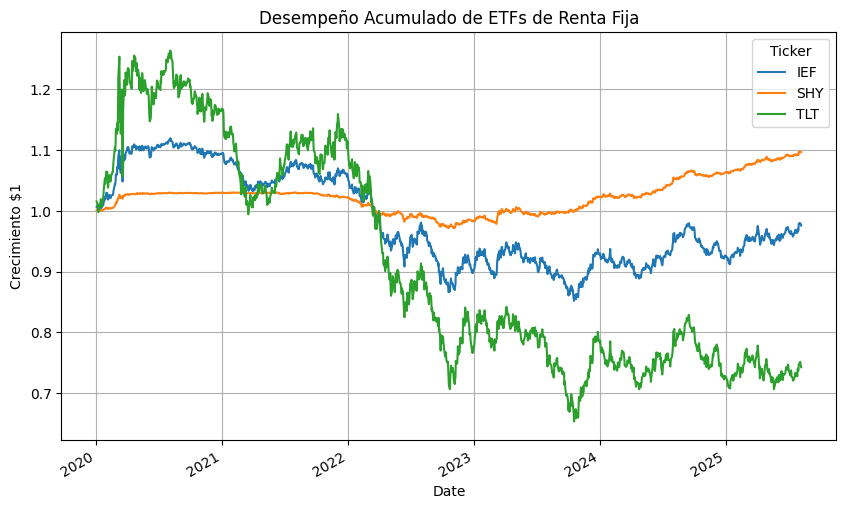

Mejor ETF de renta fija: SHY con un rendimiento acumulado de 9.67%


In [ ]:
data = yf.download(Bonos, start='2020-01-01', interval='1d')['Close']
returns = data.pct_change().dropna()

# Gráfico de desempeño acumulado
desempeno_acum = (1 + returns).cumprod()
desempeno_acum.plot(figsize=(10,6), title='Desempeño Acumulado de ETFs de Renta Fija')
plt.ylabel('Crecimiento $1')
plt.grid(True)
plt.show()

# Obtener el ticker con mejor rendimiento acumulado
rendimiento_final = desempeno_acum.iloc[-1] - 1  # rendimiento total en %
mejor_bono_ticker = rendimiento_final.idxmax()
print(f"Mejor ETF de renta fija: {mejor_bono_ticker} con un rendimiento acumulado de {rendimiento_final.max():.2%}")

# Guardarlo en una lista si se necesita después
mejor_bono = [mejor_bono_ticker]

### Elección del Activo Diversificador

In [ ]:
# Candidatos a evaluar como quinto activo
candidatos = ['GLD', 'SLV', 'DBC', 'VEA', 'VWO', 'XLU', 'XLP', 'EUR=X', 'JPY=X', 'PEN=X']
tickers = base + candidatos

# Descargar precios mensuales
data = yf.download(tickers, start="2020-01-01", interval="1d")['Close']
returns = data.pct_change().dropna()

# Correlación con los activos base
correlaciones = returns.corr().loc[candidatos, base]

# Volatilidad anualizada de los candidatos
volatilidad = returns[candidatos].std() * np.sqrt(252)

# Unir métricas
resumen = correlaciones.copy()
resumen['Volatilidad anual'] = volatilidad
resumen = resumen.sort_values('Volatilidad anual')

resumen

/tmp/ipython-input-3842567781.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", interval="1d")['Close']
[*********************100%***********************]  13 of 13 completed
/tmp/ipython-input-3842567781.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


Ticker,KLAC,LRCX,V,Volatilidad anual
Ticker,,,,
EUR=X,-0.017789,-0.005351,-0.018098,0.076240
JPY=X,-0.028176,-0.006525,-0.009343,0.094601
GLD,0.116543,0.141711,0.052264,0.156418
XLP,0.421989,0.400282,0.600304,0.164656
DBC,0.240154,0.259795,0.245775,0.193246
VEA,0.660064,0.665249,0.697214,0.195755
PEN=X,-0.025476,-0.022784,-0.021633,0.206081
VWO,0.633344,0.635077,0.585589,0.207157
XLU,0.356257,0.337975,0.520932,0.223987


In [ ]:
# Calcular la correlación promedio con los activos del portafolio base
resumen['Correlación Promedio'] = resumen[base].mean(axis=1)

# Definir la fórmula de score (pondera diversificación y riesgo)
# Puedes ajustar los pesos si deseas
peso_corr = 0.9  # Peso de la correlación promedio
peso_vol = 1 - peso_corr   # Peso de la volatilidad

# Normalizar variables para poder combinarlas
resumen['Z_Correlación'] = (resumen['Correlación Promedio'] - resumen['Correlación Promedio'].mean()) / resumen['Correlación Promedio'].std()
resumen['Z_Volatilidad'] = (resumen['Volatilidad anual'] - resumen['Volatilidad anual'].mean()) / resumen['Volatilidad anual'].std()

# Score final
resumen['Score Total'] = peso_corr * resumen['Z_Correlación'] + peso_vol * resumen['Z_Volatilidad']

# Selección del mejor candidato
mejor_activo = resumen.sort_values('Score Total').iloc[0]

# Mostrar top 3
print("\n Top 3 activos más recomendables:")
print(resumen.sort_values('Score Total').head(3))


 Top 3 activos más recomendables:
Ticker      KLAC      LRCX         V  Volatilidad anual  Correlación Promedio  \
Ticker                                                                          
EUR=X  -0.017789 -0.005351 -0.018098           0.076240             -0.013746   
JPY=X  -0.028176 -0.006525 -0.009343           0.094601             -0.014681   
PEN=X  -0.025476 -0.022784 -0.021633           0.206081             -0.023297   

Ticker  Z_Correlación  Z_Volatilidad  Score Total  
Ticker                                             
EUR=X       -1.072604      -1.621502    -1.127494  
JPY=X       -1.076158      -1.341307    -1.102673  
PEN=X       -1.108898       0.359923    -0.962016  


In [ ]:
# Selección del mejor candidato
mejor_activo_row = resumen.sort_values('Score Total').iloc[0]
mejor_ticker = mejor_activo_row.name  # El índice es el ticker

# Si quieres guardarlo en una variable tipo lista:
activo_diversificador = [mejor_ticker]

### Activos Seleccionados

In [ ]:
# Activos seleccionados + benchmark
activos = base + mejor_bono + activo_diversificador
benchmark = 'SPY'
tickers = activos + [benchmark]

## 2. Restricciones Regulatorias

- No apalancamiento ni ventas en corto:	Pesos ≥ 0
- Máx. 25% por emisor (empresa individual):	Peso máx. por activo: 0.25
- Máx. 70% en conjunto de emisores >10%:	Suma de pesos >10% debe ser ≤ 0.70
- Mín. 30% en instrumentos de renta fija/garantizados:	SHY u otro instrumento conservador ≥ 0.30
- Máx. 20% en activos no tradicionales:	Activo diversificador ≤ 0.20
- Suma de pesos = 100%:	Restricción de igualdad

In [ ]:
bounds = [
    (0, 0.25),  # acción 1: mínimo 0%, máximo 25%
    (0, 0.25),  # acción 2: igual
    (0, 0.25),  # acción 3: igual
    (0.30, 1.00),  # SHY: mínimo 35% por regulación SBS
    (0, 0.20)   # activo diversificador: máximo 20%
]

restricciones = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

def restric_sbs(w):
    return 0.70 - np.sum([wi for wi in w if wi > 0.10])

restricciones.append({'type': 'ineq', 'fun': restric_sbs})

## 3. Optimización del Portafolio

### Descargar datos

In [ ]:
# Horizonte de análisis
start_date = "2020-01-02"

# Precios mensuales
data = yf.download(tickers, start=start_date, interval="1d")['Close'].dropna()
returns = data.pct_change().dropna()

# Subdividir retornos
ret_activos = returns[activos]
ret_benchmark = returns[benchmark]

# Métricas básicas
mean_returns = ret_activos.mean() * 252
cov_matrix = ret_activos.cov() * 252

/tmp/ipython-input-2245874998.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, interval="1d")['Close'].dropna()
[*********************100%***********************]  6 of 6 completed


In [ ]:
# Fechas automáticas: de hoy hacia 1 año atrás
end = datetime.today()
start = end - timedelta(days=365)

# Descargar la tasa del Treasury a 5 años (GS5) desde FRED
rf = pdr.DataReader('GS5', 'fred', start, end).mean().values[0] / 100  # Convertido a proporción

print(f"Tasa libre de riesgo promedio (GS5) en el último año: {rf:.4%}")

Tasa libre de riesgo promedio (GS5) en el último año: 4.0436%


### Funciones Objetivos

In [ ]:
# Ratio de Sharpe
def neg_sharpe(w, mean_returns, cov_matrix, rf):
    port_return = np.dot(w, mean_returns)
    port_vol = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    return -(port_return - rf) / port_vol

# Mínima Varianza
def varianza(w, cov_matrix):
    return np.dot(w.T, np.dot(cov_matrix, w))

# Ratio Sortino
def neg_sortino(w, ret_activos, rf):
    # Retornos diarios del portafolio
    rp = (ret_activos @ w)
    mean_a = rp.mean() * 252
    downside = rp[rp < 0].std(ddof=1) * np.sqrt(252)
    # Evitar división por cero
    if downside == 0 or np.isnan(downside):
        return np.inf
    return -(mean_a - rf) / downside

# Valor Inicial

w0 = np.array([0.2]*5)

### Optimizar los modelos

In [ ]:
# Sharpe
res_sharpe = minimize(neg_sharpe, w0, args=(mean_returns, cov_matrix, rf), method='SLSQP', bounds=bounds, constraints=restricciones)

# Mínima Varianza
res_var = minimize(varianza, w0, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=restricciones)

# Sortino
res_sortino = minimize(neg_sortino, w0, args=(ret_activos, rf), method='SLSQP', bounds=bounds, constraints=restricciones)

### Consolidar y Comparar Portafolios

In [ ]:
# Inicializa DataFrame vacío
resultados = pd.DataFrame(columns=['Modelo', 'Return', 'Volatility', 'Sharpe'])

# Construir tabla resumen
def port_stats(w):
    r = np.dot(w, mean_returns)
    v = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
    s = (r - rf) / v
    return [r, v, s]

# Agrega cada portafolio
nombres = ['Sharpe', 'Mínima Varianza', 'Sortino']
for nombre, res in zip(nombres, [res_sharpe, res_var, res_sortino]):
    stats = port_stats(res.x)  # Tomamos Return, Volatility, Sharpe
    resultados.loc[len(resultados)] = [nombre] + stats

# Agrega el benchmark SPY
spy_ret = ret_benchmark.mean() * 252
spy_vol = ret_benchmark.std() * np.sqrt(252)
spy_sharpe = (spy_ret - rf) / spy_vol

resultados.loc[len(resultados)] = ['SPY (Benchmark)', spy_ret, spy_vol, spy_sharpe]

resultados

,Modelo,Return,Volatility,Sharpe
0,Sharpe,0.172219,0.196894,0.669309
1,Mínima Varianza,0.138310,0.155063,0.631189
2,Sortino,0.164230,0.185057,0.668947
3,SPY (Benchmark),0.157974,0.212231,0.553820


### Gráfica Comparativa

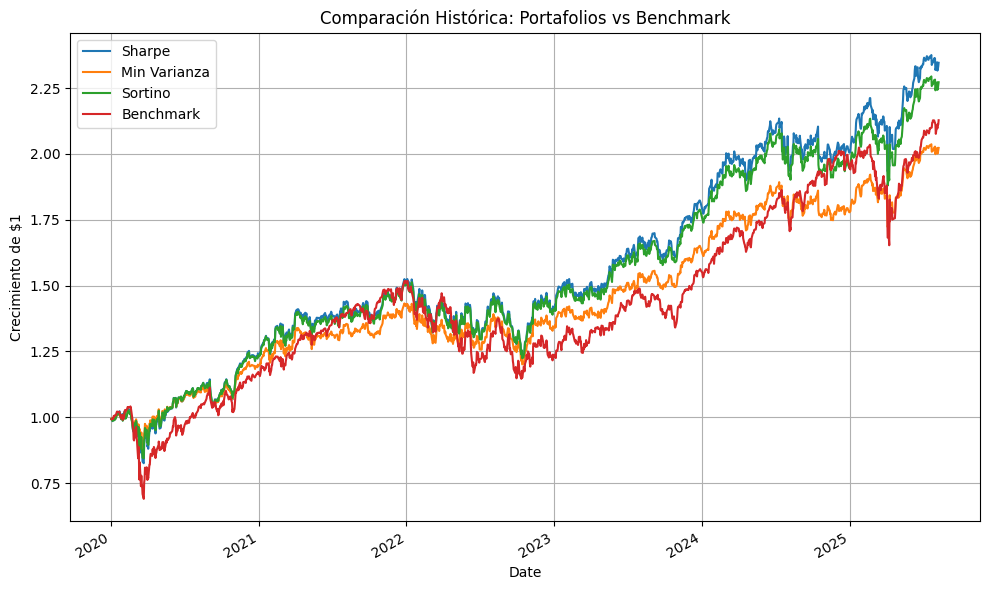

In [ ]:
# Diccionario con portafolios optimizados
portafolios = {
    'Sharpe': res_sharpe.x,
    'Min Varianza': res_var.x,
    'Sortino': res_sortino.x
}

# Calcular precios acumulados de cada portafolio
precios_portafolios = {}

for nombre, pesos in portafolios.items():
    ret_port = ret_activos @ pesos
    precios_portafolios[nombre] = (1 + ret_port).cumprod()

# Agregar benchmark
precios_portafolios['Benchmark'] = (1 + ret_benchmark).cumprod()

# Unir en un DataFrame para graficar
df_comp = pd.DataFrame(precios_portafolios)

# Gráfico comparativo
df_comp.plot(figsize=(10, 6), title='Comparación Histórica: Portafolios vs Benchmark')
plt.ylabel('Crecimiento de $1')
plt.grid(True)
plt.tight_layout()
plt.show()

### Frontera Eficiente

Portafolios válidos generados: 291


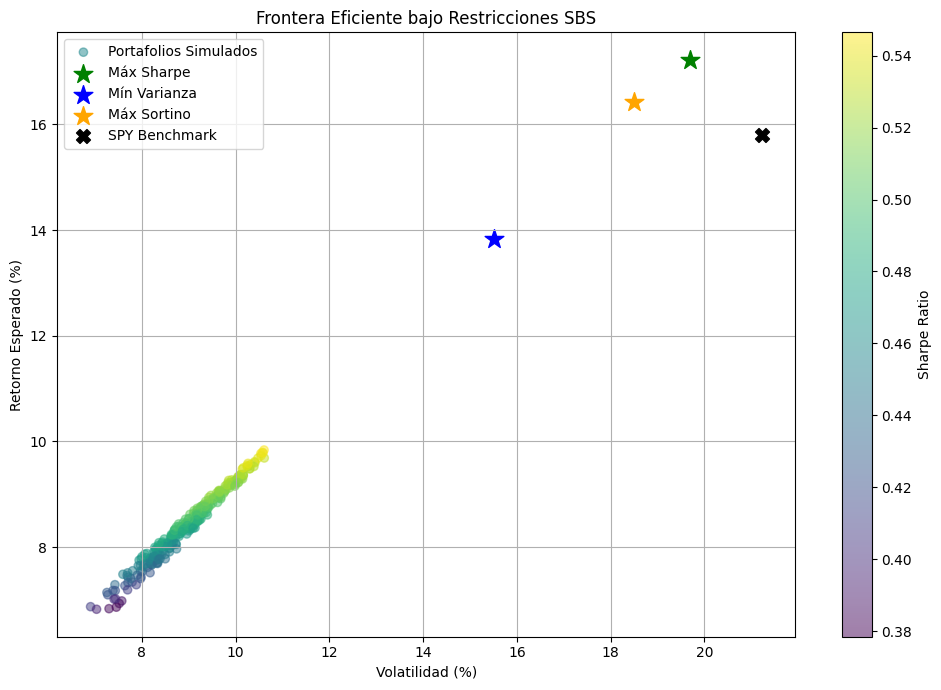

In [ ]:
n_portfolios = 100000
results = []
weights_record = []

np.random.seed(42)
count_valid = 0

for _ in range(n_portfolios):
    # Rango de pesos por activo según SBS:
    w1 = np.random.uniform(0, 0.25)   # acción 1
    w2 = np.random.uniform(0, 0.25)   # acción 2
    w3 = np.random.uniform(0, 0.25)   # acción 3
    w4 = np.random.uniform(0.30, 1.00)  # Bono
    w5 = np.random.uniform(0, 0.20)   # diversificador

    w = np.array([w1, w2, w3, w4, w5])
    w = w / np.sum(w)  # normalizar para que suma total = 1

    # Verificar restricción SBS adicional (máx. 80% en activos >10%)
    if np.sum([wi for wi in w if wi > 0.10]) <= 0.70:
        r = np.dot(w, mean_returns) * 100
        v = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w))) * 100
        s = (r / 100 - rf) / (v / 100)

        results.append((r, v, s))
        weights_record.append(w)
        count_valid += 1

print(f"Portafolios válidos generados: {count_valid}")

# Convertir a arrays
results = np.array(results)
returns_sim = results[:, 0]
vol_sim = results[:, 1]
sharpe_sim = results[:, 2]

# Extraer los portafolios optimizados ya calculados
w_sharpe = res_sharpe.x
w_var = res_var.x
w_sortino = res_sortino.x

def get_stats(w):
    r = np.dot(w, mean_returns) * 100
    v = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w))) * 100
    return r, v

r_sharpe, v_sharpe = get_stats(w_sharpe)
r_var, v_var = get_stats(w_var)
r_sortino, v_sortino = get_stats(w_sortino)

# SPY
r_spy = spy_ret * 100
v_spy = spy_vol * 100

# Plot
plt.figure(figsize=(10, 7))
sc = plt.scatter(vol_sim, returns_sim, c=sharpe_sim, cmap='viridis', alpha=0.5, label='Portafolios Simulados')
plt.colorbar(sc, label='Sharpe Ratio')

# Marcar portafolios óptimos y benchmark
plt.scatter(v_sharpe, r_sharpe, color='green', marker='*', s=200, label='Máx Sharpe')
plt.scatter(v_var, r_var, color='blue', marker='*', s=200, label='Mín Varianza')
plt.scatter(v_sortino, r_sortino, color='orange', marker='*', s=200, label='Máx Sortino')
plt.scatter(v_spy, r_spy, color='black', marker='X', s=100, label='SPY Benchmark')

plt.title('Frontera Eficiente bajo Restricciones SBS')
plt.xlabel('Volatilidad (%)')
plt.ylabel('Retorno Esperado (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Cálculo de las Métricas de Riesgo

### Parámetros Generales

In [ ]:
confianza = 0.95
z = norm.ppf(1 - confianza)
horizonte = 10  # días
monto_invertido = 100000  # USD
n_simulaciones = 100000 # Para Monte Carlo
lambda_=0.94 # Para EWMA

### VaR Delta-Normal

In [ ]:
# Función para calcular VaR Delta-Normal
def calcular_var_delta_normal(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):

    # Volatilidad diaria por activo
    vol_individual = retornos.std()

    # VaR individual porcentual
    var_ind_pct = -z * vol_individual * np.array(w) * np.sqrt(horizonte)

    # VaR individual absoluto en USD
    var_ind_usd = var_ind_pct * monto_invertido

    # VaR de portafolio total
    cov = retornos.cov()
    port_vol = np.sqrt(np.dot(w, np.dot(cov, w)))
    var_port_pct = -z * port_vol * np.sqrt(horizonte)
    var_port_usd = var_port_pct * monto_invertido

    return var_ind_pct, var_ind_usd, var_port_pct, var_port_usd

# Diccionarios para almacenar resultados
var_pct_dict = {}
var_usd_dict = {}
var_portafolio_pct = {}
var_portafolio_usd = {}

# Calcular VaR para cada portafolio
for nombre, pesos in portafolios.items():
    v_pct_ind, v_usd_ind, v_pct_port, v_usd_port = calcular_var_delta_normal(
        pesos, ret_activos)

    var_pct_dict[nombre] = v_pct_ind * 100  # a porcentaje
    var_usd_dict[nombre] = v_usd_ind
    var_portafolio_pct[nombre] = [v_pct_port * 100]
    var_portafolio_usd[nombre] = [v_usd_port]

# DataFrames finales

# En porcentaje (% del monto invertido)
df_var_individual_pct = pd.DataFrame(var_pct_dict, index=activos)
df_var_portafolio_pct = pd.DataFrame(var_portafolio_pct, index=['VaR Portafolio %'])

# En dólares (USD)
df_var_individual_usd = pd.DataFrame(var_usd_dict, index=activos)
df_var_portafolio_usd = pd.DataFrame(var_portafolio_usd, index=['VaR Portafolio USD'])

# Mostrar resultados
print("VaR Individual (%)")
display(df_var_individual_pct)

print("VaR del Portafolio (%)")
display(df_var_portafolio_pct)

print("VaR Individual (USD)")
display(df_var_individual_usd)

print("VaR del Portafolio (USD)")
display(df_var_portafolio_usd)

VaR Individual (%)


,Sharpe,Min Varianza,Sortino
KLAC,3.784723,3.027291,3.784645
LRCX,1.602559,1.602559,1.602493
V,1.834461,0.901977,1.278626
SHY,0.214088,0.280511,0.252156
EUR=X,0.253284,0.369472,0.253283


VaR del Portafolio (%)


,Sharpe,Min Varianza,Sortino
VaR Portafolio %,6.451485,5.08084,6.063644


VaR Individual (USD)


,Sharpe,Min Varianza,Sortino
KLAC,3784.723397,3027.291352,3784.645138
LRCX,1602.558646,1602.558721,1602.492781
V,1834.460740,901.976559,1278.625971
SHY,214.087879,280.511104,252.155891
EUR=X,253.284285,369.471531,253.283304


VaR del Portafolio (USD)


,Sharpe,Min Varianza,Sortino
VaR Portafolio USD,6451.484983,5080.840158,6063.643659


### VaR Histórico

In [ ]:
def calcular_var_historico(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    # Portafolio: pasamos a log-retornos para agregar en el tiempo
    ret_port = retornos @ w
    log_port = np.log1p(ret_port)
    log_T = log_port.rolling(horizonte).sum().dropna()
    ret_T = np.expm1(log_T)  # retorno compuesto a T días

    var_port_pct = -np.percentile(ret_T, (1 - nivel) * 100.0)
    var_port_usd = var_port_pct * monto_invertido

    # VaR "individual ponderado" a T días (mismo criterio que el resto del script)
    var_ind_pct, var_ind_usd = [], []
    for i, col in enumerate(retornos.columns):
        log_i = np.log1p(retornos[col]).rolling(horizonte).sum().dropna()
        ret_i_T = np.expm1(log_i)
        var_i_pct = -np.percentile(ret_i_T, (1 - nivel) * 100.0)
        var_ind_pct.append(var_i_pct * w[i])
        var_ind_usd.append(var_i_pct * w[i] * monto_invertido)

    return np.array(var_ind_pct) * 100.0, np.array(var_ind_usd), var_port_pct * 100.0, var_port_usd

# Diccionarios de resultados
var_hist_pct_dict = {}
var_hist_usd_dict = {}
var_hist_portafolio_pct = {}
var_hist_portafolio_usd = {}

for nombre, pesos in portafolios.items():
    v_pct_ind, v_usd_ind, v_pct_port, v_usd_port = calcular_var_historico(
        pesos, ret_activos)

    var_hist_pct_dict[nombre] = v_pct_ind
    var_hist_usd_dict[nombre] = v_usd_ind
    var_hist_portafolio_pct[nombre] = [v_pct_port]
    var_hist_portafolio_usd[nombre] = [v_usd_port]

# En porcentaje
df_var_hist_ind_pct = pd.DataFrame(var_hist_pct_dict, index=activos)
df_var_hist_port_pct = pd.DataFrame(var_hist_portafolio_pct, index=['VaR Portafolio %'])

# En USD
df_var_hist_ind_usd = pd.DataFrame(var_hist_usd_dict, index=activos)
df_var_hist_port_usd = pd.DataFrame(var_hist_portafolio_usd, index=['VaR Portafolio USD'])

# Mostrar
print("VaR Histórico Individual (%)")
display(df_var_hist_ind_pct)

print("VaR Histórico del Portafolio (%)")
display(df_var_hist_port_pct)

print("VaR Histórico Individual (USD)")
display(df_var_hist_ind_usd)

print("VaR Histórico del Portafolio (USD)")
display(df_var_hist_port_usd)

VaR Histórico Individual (%)


,Sharpe,Min Varianza,Sortino
KLAC,2.800843,2.240314,2.800785
LRCX,1.285455,1.285455,1.285403
V,1.496734,0.735922,1.043230
SHY,0.171230,0.224356,0.201677
EUR=X,0.258902,0.377666,0.258901


VaR Histórico del Portafolio (%)


,Sharpe,Min Varianza,Sortino
VaR Portafolio %,4.823682,3.653357,4.394783


VaR Histórico Individual (USD)


,Sharpe,Min Varianza,Sortino
KLAC,2800.843219,2240.313906,2800.785304
LRCX,1285.455433,1285.455493,1285.402601
V,1496.734498,735.921681,1043.229522
SHY,171.230088,224.356191,201.677347
EUR=X,258.901765,377.665877,258.900762


VaR Histórico del Portafolio (USD)


,Sharpe,Min Varianza,Sortino
VaR Portafolio USD,4823.682344,3653.357466,4394.783077


### VaR Monte Carlo

In [ ]:
def calcular_var_monte_carlo(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    # 1) Estadísticas en log-retornos diarios
    logrets = np.log1p(retornos)
    mu = logrets.mean().values              # vector mu_diario (log)
    sigma = logrets.std(ddof=1).values      # vector sigma_diario (log)
    corr = np.corrcoef(logrets.T)           # correlación entre activos (log)
    n_activos = len(w)

    # 2) Cholesky de correlación para choques correlacionados
    L = np.linalg.cholesky(corr)

    # 3) Simular shocks Z ~ N(0, I) y correlacionarlos
    Z = np.random.randn(n_simulaciones, n_activos) @ L.T   # (n_sim, n_activos)

    # 4) Escalar a horizonte T: log-retorno GBM de cada activo
    T = float(horizonte)   # días
    drift = (mu - 0.5 * sigma**2) * T
    vol_T = sigma * np.sqrt(T)
    logR = drift + Z * vol_T          # log(S_T/S_0)
    R = np.exp(logR) - 1.0            # retorno compuesto a T

    # 5) Retorno del portafolio a T (pesos fijos, aprox. lineal en retornos)
    port_ret_sim = R @ w

    # 6) VaR de portafolio
    var_port_pct = -np.percentile(port_ret_sim, (1 - nivel) * 100.0)
    var_port_usd = var_port_pct * monto_invertido

    # 7) VaR "individual ponderado" (misma lógica que tu código actual)
    var_ind_pct = []
    var_ind_usd = []
    for i in range(n_activos):
        var_i_pct = -np.percentile(R[:, i], (1 - nivel) * 100.0)
        var_ind_pct.append(var_i_pct * w[i])
        var_ind_usd.append(var_i_pct * w[i] * monto_invertido)

    return np.array(var_ind_pct) * 100.0, np.array(var_ind_usd), var_port_pct * 100.0, var_port_usd

  # Diccionarios de resultados
var_mc_pct_dict = {}
var_mc_usd_dict = {}
var_mc_portafolio_pct = {}
var_mc_portafolio_usd = {}

for nombre, pesos in portafolios.items():
    v_pct_ind, v_usd_ind, v_pct_port, v_usd_port = calcular_var_monte_carlo(
        pesos, ret_activos)

    var_mc_pct_dict[nombre] = v_pct_ind
    var_mc_usd_dict[nombre] = v_usd_ind
    var_mc_portafolio_pct[nombre] = [v_pct_port]
    var_mc_portafolio_usd[nombre] = [v_usd_port]

# En porcentaje
df_var_mc_ind_pct = pd.DataFrame(var_mc_pct_dict, index=activos)
df_var_mc_port_pct = pd.DataFrame(var_mc_portafolio_pct, index=['VaR Portafolio %'])

# En USD
df_var_mc_ind_usd = pd.DataFrame(var_mc_usd_dict, index=activos)
df_var_mc_port_usd = pd.DataFrame(var_mc_portafolio_usd, index=['VaR Portafolio USD'])

# Mostrar
print("VaR Monte Carlo Individual (%)")
display(df_var_mc_ind_pct)

print("VaR Monte Carlo del Portafolio (%)")
display(df_var_mc_port_pct)

print("VaR Monte Carlo Individual (USD)")
display(df_var_mc_ind_usd)

print("VaR Monte Carlo del Portafolio (USD)")
display(df_var_mc_port_usd)

VaR Monte Carlo Individual (%)


,Sharpe,Min Varianza,Sortino
KLAC,3.331288,2.679762,3.340797
LRCX,1.443715,1.449279,1.447419
V,1.702572,0.844609,1.181931
SHY,0.192020,0.252874,0.223412
EUR=X,0.254419,0.372253,0.255451


VaR Monte Carlo del Portafolio (%)


,Sharpe,Min Varianza,Sortino
VaR Portafolio %,5.722179,4.506254,5.391068


VaR Monte Carlo Individual (USD)


,Sharpe,Min Varianza,Sortino
KLAC,3331.288337,2679.762413,3340.797283
LRCX,1443.715296,1449.278722,1447.418518
V,1702.572030,844.608721,1181.931481
SHY,192.019578,252.874450,223.411954
EUR=X,254.419008,372.252570,255.450879


VaR Monte Carlo del Portafolio (USD)


,Sharpe,Min Varianza,Sortino
VaR Portafolio USD,5722.178601,4506.254129,5391.068172


### VaR EWMA

In [ ]:
def calcular_ewma_vol(retornos):
    ewma_var = []
    for serie in retornos.T.values:  # iteramos por columna
        var_t = np.var(serie)  # varianza inicial
        ewma = [var_t]
        for r in serie[1:]:
            var_t = lambda_ * var_t + (1 - lambda_) * r**2
            ewma.append(var_t)
        ewma_var.append(np.sqrt(ewma[-1]))  # última desviación estándar
    return np.array(ewma_var)

def calcular_var_ewma(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    z = norm.ppf(1 - confianza)

    # Volatilidad EWMA individual
    ewma_vol_ind = calcular_ewma_vol(retornos)
    var_ind_pct = -z * ewma_vol_ind * np.array(w) * np.sqrt(horizonte)
    var_ind_usd = var_ind_pct * monto_invertido

    # Varianza EWMA del portafolio
    cov = retornos.cov().values
    ewma_cov = np.outer(ewma_vol_ind, ewma_vol_ind) * np.corrcoef(retornos.T)
    port_vol = np.sqrt(np.dot(w, np.dot(ewma_cov, w)))
    var_port_pct = -z * port_vol * np.sqrt(horizonte)
    var_port_usd = var_port_pct * monto_invertido

    return var_ind_pct * 100, var_ind_usd, var_port_pct * 100, var_port_usd

# Diccionarios para guardar resultados
var_ewma_pct_dict = {}
var_ewma_usd_dict = {}
var_ewma_portafolio_pct = {}
var_ewma_portafolio_usd = {}

for nombre, pesos in portafolios.items():
    v_pct_ind, v_usd_ind, v_pct_port, v_usd_port = calcular_var_ewma(
        pesos, ret_activos)

    var_ewma_pct_dict[nombre] = v_pct_ind
    var_ewma_usd_dict[nombre] = v_usd_ind
    var_ewma_portafolio_pct[nombre] = [v_pct_port]
    var_ewma_portafolio_usd[nombre] = [v_usd_port]

# En porcentaje
df_var_ewma_ind_pct = pd.DataFrame(var_ewma_pct_dict, index=activos)
df_var_ewma_port_pct = pd.DataFrame(var_ewma_portafolio_pct, index=['VaR Portafolio %'])

# En USD
df_var_ewma_ind_usd = pd.DataFrame(var_ewma_usd_dict, index=activos)
df_var_ewma_port_usd = pd.DataFrame(var_ewma_portafolio_usd, index=['VaR Portafolio USD'])

# Mostrar
print("VaR EWMA Individual (%)")
display(df_var_ewma_ind_pct)

print("VaR EWMA del Portafolio (%)")
display(df_var_ewma_port_pct)

print("VaR EWMA Individual (USD)")
display(df_var_ewma_ind_usd)

print("VaR EWMA del Portafolio (USD)")
display(df_var_ewma_port_usd)

VaR EWMA Individual (%)


,Sharpe,Min Varianza,Sortino
KLAC,2.801876,2.241140,2.801818
LRCX,1.069785,1.069785,1.069741
V,1.365488,0.671390,0.951750
SHY,0.224591,0.294273,0.264526
EUR=X,0.297705,0.434270,0.297704


VaR EWMA del Portafolio (%)


,Sharpe,Min Varianza,Sortino
VaR Portafolio %,4.67726,3.668481,4.388209


VaR EWMA Individual (USD)


,Sharpe,Min Varianza,Sortino
KLAC,2801.875899,2241.139917,2801.817963
LRCX,1069.784599,1069.784649,1069.740631
V,1365.487954,671.389744,951.750192
SHY,224.590873,294.272772,264.526473
EUR=X,297.705408,434.269630,297.704255


VaR EWMA del Portafolio (USD)


,Sharpe,Min Varianza,Sortino
VaR Portafolio USD,4677.259547,3668.480729,4388.209085


### VaR GARCH

In [ ]:
!pip install arch

In [ ]:
from arch import arch_model

def calcular_vol_garch(serie):
    modelo = arch_model(serie * 100, vol='Garch', p=1, q=1, rescale=False)
    resultado = modelo.fit(disp='off')
    sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
    return sigma_t

def calcular_var_garch(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    n = len(w)

    # Estimar volatilidad individual con GARCH
    vol_garch_ind = np.array([calcular_vol_garch(retornos[col]) for col in retornos.columns])

    # VaR individual
    var_ind_pct = -z * vol_garch_ind * np.array(w) * np.sqrt(horizonte)
    var_ind_usd = var_ind_pct * monto_invertido

    # Matriz de correlaciones y varianzas individuales
    correlacion = retornos.corr().values
    cov_garch = np.outer(vol_garch_ind, vol_garch_ind) * correlacion

    # VaR de portafolio
    port_vol = np.sqrt(np.dot(w, np.dot(cov_garch, w)))
    var_port_pct = -z * port_vol * np.sqrt(horizonte)
    var_port_usd = var_port_pct * monto_invertido

    return var_ind_pct * 100, var_ind_usd, var_port_pct * 100, var_port_usd

# Diccionarios para resultados
var_garch_pct_dict = {}
var_garch_usd_dict = {}
var_garch_portafolio_pct = {}
var_garch_portafolio_usd = {}

for nombre, pesos in portafolios.items():
    v_pct_ind, v_usd_ind, v_pct_port, v_usd_port = calcular_var_garch(
        pesos, ret_activos)

    var_garch_pct_dict[nombre] = v_pct_ind
    var_garch_usd_dict[nombre] = v_usd_ind
    var_garch_portafolio_pct[nombre] = [v_pct_port]
    var_garch_portafolio_usd[nombre] = [v_usd_port]

# En porcentaje
df_var_garch_ind_pct = pd.DataFrame(var_garch_pct_dict, index=activos)
df_var_garch_port_pct = pd.DataFrame(var_garch_portafolio_pct, index=['VaR Portafolio %'])

# En USD
df_var_garch_ind_usd = pd.DataFrame(var_garch_usd_dict, index=activos)
df_var_garch_port_usd = pd.DataFrame(var_garch_portafolio_usd, index=['VaR Portafolio USD'])

# Mostrar
print("VaR GARCH Individual (%)")
display(df_var_garch_ind_pct)

print("VaR GARCH del Portafolio (%)")
display(df_var_garch_port_pct)

print("VaR GARCH Individual (USD)")
display(df_var_garch_ind_usd)

print("VaR GARCH del Portafolio (USD)")
display(df_var_garch_port_usd)

/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = re

VaR GARCH Individual (%)


/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala


,Sharpe,Min Varianza,Sortino
KLAC,3.371256,2.696571,3.371186
LRCX,1.254152,1.254152,1.254101
V,1.463284,0.719475,1.019915
SHY,0.265808,0.348278,0.313073
EUR=X,0.295783,0.431465,0.295782


VaR GARCH del Portafolio (%)


,Sharpe,Min Varianza,Sortino
VaR Portafolio %,5.466051,4.317521,5.162338


VaR GARCH Individual (USD)


,Sharpe,Min Varianza,Sortino
KLAC,3371.255909,2696.570604,3371.186199
LRCX,1254.152434,1254.152493,1254.100888
V,1463.284208,719.474680,1019.914545
SHY,265.807900,348.277856,313.072502
EUR=X,295.782964,431.465318,295.781818


VaR GARCH del Portafolio (USD)


,Sharpe,Min Varianza,Sortino
VaR Portafolio USD,5466.051468,4317.521011,5162.337927


### CVaR

In [ ]:
alpha = 1 - confianza

def cvar_delta_normal(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    # Vol de portafolio con matriz de covarianza histórica
    cov = retornos.cov().values
    port_vol = float(np.sqrt(np.dot(w, np.dot(cov, w))))
    # Fórmula analítica de ES para Normal(0, σ) en cola inferior
    z_alpha = norm.ppf(1 - nivel)            # < 0 cuando nivel=0.95
    cvar_prop = (norm.pdf(z_alpha) / alpha) * port_vol * np.sqrt(horizonte)
    return cvar_prop, cvar_prop * monto_invertido

def cvar_historico(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    ret_port = retornos @ w
    log_T = np.log1p(ret_port).rolling(horizonte).sum().dropna()
    ret_T = np.expm1(log_T)

    var_thr = np.percentile(ret_T, (1 - nivel) * 100.0)
    tail = ret_T[ret_T <= var_thr]
    cvar_prop = -float(tail.mean())
    return cvar_prop, cvar_prop * monto_invertido

def cvar_monte_carlo(w, retornos, nivel=confianza, horizonte=horizonte, n_sim=n_simulaciones, monto_invertido=monto_invertido):
    # Estimar mu/sigma en log-retornos diarios y correlación
    logrets = np.log1p(retornos)
    mu = logrets.mean().values
    sig = logrets.std(ddof=1).values
    corr = np.corrcoef(logrets.T)

    # Corregir numéricamente si corr no es p.s.d.
    try:
        L = np.linalg.cholesky(corr)
    except np.linalg.LinAlgError:
        eps = 1e-6
        corr = (1 - eps) * corr + eps * np.eye(len(sig))
        L = np.linalg.cholesky(corr)

    # Simular log-retornos a T días (GBM)
    T = float(horizonte)
    Z = np.random.randn(n_sim, len(sig)) @ L.T
    logR = (mu - 0.5 * sig**2) * T + Z * sig * np.sqrt(T)
    R = np.exp(logR) - 1.0
    port_sim = R @ w

    var_thr = np.percentile(port_sim, (1 - nivel) * 100.0)
    tail = port_sim[port_sim <= var_thr]
    cvar_prop = -float(tail.mean())
    return cvar_prop, cvar_prop * monto_invertido

def cvar_ewma(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    # Volatilidades EWMA individuales y matriz de correlación histórica
    ewma_vol_ind = calcular_ewma_vol(retornos)               # vector σ_i (diario)
    corr = np.corrcoef(retornos.T)                           # correlación histórica
    ewma_cov = np.outer(ewma_vol_ind, ewma_vol_ind) * corr   # cov EWMA diaria
    port_vol = float(np.sqrt(np.dot(w, np.dot(ewma_cov, w))))
    z_alpha = norm.ppf(1 - nivel)
    cvar_prop = (norm.pdf(z_alpha) / alpha) * port_vol * np.sqrt(horizonte)
    return cvar_prop, cvar_prop * monto_invertido

def cvar_garch(w, retornos, nivel=confianza, horizonte=horizonte, monto_invertido=monto_invertido):
    # Vol GARCH individual (ya usas arch p=1,q=1) + correlación histórica
    vol_garch_ind = np.array([calcular_vol_garch(retornos[col]) for col in retornos.columns])  # σ_i diarios
    corr = retornos.corr().values
    cov_garch = np.outer(vol_garch_ind, vol_garch_ind) * corr
    port_vol = float(np.sqrt(np.dot(w, np.dot(cov_garch, w))))
    z_alpha = norm.ppf(1 - nivel)
    cvar_prop = (norm.pdf(z_alpha) / alpha) * port_vol * np.sqrt(horizonte)
    return cvar_prop, cvar_prop * monto_invertido

# Ejecutar para los 3 portafolios y 5 métodos
metodos_cvar = {
    'CVaR Delta-Normal': cvar_delta_normal,
    'CVaR Histórico':    cvar_historico,
    'CVaR Monte Carlo':  cvar_monte_carlo,
    'CVaR EWMA':         cvar_ewma,
    'CVaR GARCH':        cvar_garch,
}

# DataFrames resultado (en % y en USD)
df_cvar_port_pct = pd.DataFrame(index=metodos_cvar.keys(), columns=portafolios.keys(), dtype=float)
df_cvar_port_usd = pd.DataFrame(index=metodos_cvar.keys(), columns=portafolios.keys(), dtype=float)

for metodo, fun in metodos_cvar.items():
    for nombre_port, w in portafolios.items():
        cvar_prop, cvar_usd = fun(w, ret_activos)
        df_cvar_port_pct.loc[metodo, nombre_port] = cvar_prop * 100.0
        df_cvar_port_usd.loc[metodo, nombre_port] = cvar_usd

print("CVaR del Portafolio por método (%)")
display(df_cvar_port_pct.round(3))

print("CVaR del Portafolio por método (USD)")
display(df_cvar_port_usd.round(2))

/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = re

CVaR del Portafolio por método (%)


/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = resultado.conditional_volatility[-1] / 100  # Devuelve último valor y reescala
/tmp/ipython-input-2891345651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma_t = re

,Sharpe,Min Varianza,Sortino
CVaR Delta-Normal,8.090,6.372,7.604
CVaR Histórico,6.533,5.025,6.055
CVaR Monte Carlo,7.135,5.613,6.712
CVaR EWMA,5.865,4.600,5.503
CVaR GARCH,6.855,5.414,6.474


CVaR del Portafolio por método (USD)


,Sharpe,Min Varianza,Sortino
CVaR Delta-Normal,8090.42,6371.58,7604.05
CVaR Histórico,6533.31,5024.69,6054.63
CVaR Monte Carlo,7134.60,5613.16,6711.71
CVaR EWMA,5865.47,4600.42,5502.99
CVaR GARCH,6854.65,5414.35,6473.78


### Cuadro Resumen

In [ ]:
# Consolidar todos los VaR y CVaR en porcentaje
resumen_pct = pd.concat([
    df_var_portafolio_pct.rename(index={'VaR Portafolio %': 'VaR Delta-Normal'}),
    df_var_hist_port_pct.rename(index={'VaR Portafolio %': 'VaR Histórico'}),
    df_var_mc_port_pct.rename(index={'VaR Portafolio %': 'VaR Monte Carlo'}),
    df_var_ewma_port_pct.rename(index={'VaR Portafolio %': 'VaR EWMA'}),
    df_var_garch_port_pct.rename(index={'VaR Portafolio %': 'VaR GARCH'}),
    df_cvar_port_pct.rename(index={
        'CVaR Delta-Normal': 'CVaR Delta-Normal',
        'CVaR Histórico': 'CVaR Histórico',
        'CVaR Monte Carlo': 'CVaR Monte Carlo',
        'CVaR EWMA': 'CVaR EWMA',
        'CVaR GARCH': 'CVaR GARCH'
    })
])

# Consolidar todos los VaR y CVaR en dólares
resumen_usd = pd.concat([
    df_var_portafolio_usd.rename(index={'VaR Portafolio USD': 'VaR Delta-Normal'}),
    df_var_hist_port_usd.rename(index={'VaR Portafolio USD': 'VaR Histórico'}),
    df_var_mc_port_usd.rename(index={'VaR Portafolio USD': 'VaR Monte Carlo'}),
    df_var_ewma_port_usd.rename(index={'VaR Portafolio USD': 'VaR EWMA'}),
    df_var_garch_port_usd.rename(index={'VaR Portafolio USD': 'VaR GARCH'}),
    df_cvar_port_usd.rename(index={
        'CVaR Delta-Normal': 'CVaR Delta-Normal',
        'CVaR Histórico': 'CVaR Histórico',
        'CVaR Monte Carlo': 'CVaR Monte Carlo',
        'CVaR EWMA': 'CVaR EWMA',
        'CVaR GARCH': 'CVaR GARCH'
    })
])

# Mostrar resumen final
print("Cuadro Resumen - VaR y CVaR del Portafolio (%)")
display(resumen_pct.round(2))

print("Cuadro Resumen - VaR y CVaR del Portafolio (USD)")
display(resumen_usd.round(2))

Cuadro Resumen - VaR y CVaR del Portafolio (%)


,Sharpe,Min Varianza,Sortino
VaR Delta-Normal,6.45,5.08,6.06
VaR Histórico,4.82,3.65,4.39
VaR Monte Carlo,5.72,4.51,5.39
VaR EWMA,4.68,3.67,4.39
VaR GARCH,5.47,4.32,5.16
CVaR Delta-Normal,8.09,6.37,7.60
CVaR Histórico,6.53,5.02,6.05
CVaR Monte Carlo,7.13,5.61,6.71
CVaR EWMA,5.87,4.60,5.50
CVaR GARCH,6.85,5.41,6.47


Cuadro Resumen - VaR y CVaR del Portafolio (USD)


,Sharpe,Min Varianza,Sortino
VaR Delta-Normal,6451.48,5080.84,6063.64
VaR Histórico,4823.68,3653.36,4394.78
VaR Monte Carlo,5722.18,4506.25,5391.07
VaR EWMA,4677.26,3668.48,4388.21
VaR GARCH,5466.05,4317.52,5162.34
CVaR Delta-Normal,8090.42,6371.58,7604.05
CVaR Histórico,6533.31,5024.69,6054.63
CVaR Monte Carlo,7134.60,5613.16,6711.71
CVaR EWMA,5865.47,4600.42,5502.99
CVaR GARCH,6854.65,5414.35,6473.78


## 5. Validación Regulatoria

### Validación

In [ ]:
# --- LÍMITES REGULATORIOS ---
limite_var_pct           = 5.5   # VaR Portafolio %   (95%, 10 días típico)
limite_cvar_pct          = 7.7   # CVaR Portafolio %  (≈1.4x VaR)
aporte_max_riesgo_pct    = 60.0  # Máx contribución individual para activos de riesgo
aporte_max_defensivo_pct = 10.0  # Máx contribución individual para activos defensivos (p.ej., SHY)

# --- CLASIFICACIÓN DE ACTIVOS ---
# Marca los activos defensivos; el resto se consideran "riesgo".
activos_defensivos = mejor_bono
activos_riesgo = [a for a in activos if a not in activos_defensivos]

# --- Mapeo de métodos a sus DataFrames de VaR (portafolio e individual) ---
mapa_metodos = {
    'Delta-Normal': {'var_port_df': df_var_portafolio_pct, 'var_ind_df': df_var_individual_pct},
    'Histórico':    {'var_port_df': df_var_hist_port_pct,   'var_ind_df': df_var_hist_ind_pct},
    'Monte Carlo':  {'var_port_df': df_var_mc_port_pct,     'var_ind_df': df_var_mc_ind_pct},
    'EWMA':         {'var_port_df': df_var_ewma_port_pct,   'var_ind_df': df_var_ewma_ind_pct},
    'GARCH':        {'var_port_df': df_var_garch_port_pct,  'var_ind_df': df_var_garch_ind_pct},
}

# --- Helper para tomar el CVaR por método desde df_cvar_port_pct ---
def obtener_cvar_port(df_cvar_port_pct, metodo, nombre_port):
    etiqueta = f'CVaR {metodo}'
    if etiqueta in df_cvar_port_pct.index:
        return float(df_cvar_port_pct.loc[etiqueta, nombre_port])
    # compatibilidad por si quedó sólo "CVaR Portafolio %"
    if 'CVaR Portafolio %' in df_cvar_port_pct.index:
        return float(df_cvar_port_pct.loc['CVaR Portafolio %', nombre_port])
    raise KeyError(f"No se encontró CVaR para el método '{metodo}' en df_cvar_port_pct")

# --- Construcción de tabla de validación ---
filas = []
for metodo, dfs in mapa_metodos.items():
    var_port_df = dfs['var_port_df']
    var_ind_df  = dfs['var_ind_df']

    for nombre_port in portafolios.keys():
        # VaR portafolio %
        try:
            var_port_pct = float(var_port_df.loc['VaR Portafolio %', nombre_port])
        except KeyError:
            raise KeyError(f"En {metodo}, falta 'VaR Portafolio %' o la columna '{nombre_port}'")

        # CVaR portafolio %
        cvar_port_pct = obtener_cvar_port(df_cvar_port_pct, metodo, nombre_port)

        # Contribuciones individuales relativas al VaR del portafolio
        if var_port_pct == 0 or np.isnan(var_port_pct):
            # Evita división por cero
            aporte_max_riesgo = np.nan
            aporte_max_def    = np.nan
            cumple_aporte     = False
            detalle_brecha    = "VaR portafolio = 0"
        else:
            serie_var_ind_pct = var_ind_df[nombre_port].reindex(activos)  # asegura orden y presencia
            contrib_pct = (serie_var_ind_pct / var_port_pct) * 100.0

            # Máximo por grupo
            aporte_max_riesgo = float(contrib_pct.loc[activos_riesgo].max()) if len(activos_riesgo) else np.nan
            aporte_max_def    = float(contrib_pct.loc[list(activos_defensivos)].max()) if len(activos_defensivos) else np.nan

            # Chequeo por-asset con topes duales
            mask_riesgo_ok = contrib_pct.loc[activos_riesgo]    <= aporte_max_riesgo_pct if len(activos_riesgo) else pd.Series(dtype=bool)
            mask_def_ok    = contrib_pct.loc[list(activos_defensivos)] <= aporte_max_defensivo_pct if len(activos_defensivos) else pd.Series(dtype=bool)

            # Si hay algún activo fuera de límite
            fuera_riesgo = contrib_pct.loc[activos_riesgo][~mask_riesgo_ok] if len(activos_riesgo) else pd.Series(dtype=float)
            fuera_def    = contrib_pct.loc[list(activos_defensivos)][~mask_def_ok] if len(activos_defensivos) else pd.Series(dtype=float)

            cumple_aporte = (fuera_riesgo.empty and fuera_def.empty)
            detalle_brecha = ""
            if not cumple_aporte:
                partes = []
                if not fuera_riesgo.empty:
                    partes.append(f"Riesgo>{aporte_max_riesgo_pct}%: {', '.join([f'{k}={v:.1f}%' for k, v in fuera_riesgo.items()])}")
                if not fuera_def.empty:
                    partes.append(f"Defensivo>{aporte_max_defensivo_pct}%: {', '.join([f'{k}={v:.1f}%' for k, v in fuera_def.items()])}")
                detalle_brecha = " | ".join(partes)

        # Chequeos VaR/CVaR
        chk_var  = (var_port_pct  <= limite_var_pct)
        chk_cvar = (cvar_port_pct <= limite_cvar_pct)

        filas.append({
            'Portafolio': nombre_port,
            'Método': metodo,
            'VaR Portafolio %': var_port_pct,
            'CVaR Portafolio %': cvar_port_pct,
            'Aporte Máx Riesgo %': aporte_max_riesgo,
            'Aporte Máx Defensivo %': aporte_max_def,
            'Cumple VaR': chk_var,
            'Cumple CVaR': chk_cvar,
            'Cumple Aporte Dual': cumple_aporte,
            'Detalle Aporte (brechas)': detalle_brecha,
            'Cumple TODO': (chk_var and chk_cvar and cumple_aporte),
        })

df_validacion = pd.DataFrame(filas)

# Sólo los modelos que cumplen todo
df_regulatorio_ok = df_validacion[df_validacion['Cumple TODO']].reset_index(drop=True)

print("Validación regulatoria — detalle por modelo (tope dual)")
display(df_validacion.sort_values(['Portafolio','Método']).reset_index(drop=True).round(3))

print("Modelos que PASAN la regulación (tope dual)")
display(df_regulatorio_ok.sort_values(['Portafolio','Método']).round(3))

✅ Validación regulatoria — detalle por modelo (tope dual)


,Portafolio,Método,VaR Portafolio %,CVaR Portafolio %,Aporte Máx Riesgo %,Aporte Máx Defensivo %,Cumple VaR,Cumple CVaR,Cumple Aporte Dual,Detalle Aporte (brechas),Cumple TODO
0,Min Varianza,Delta-Normal,5.081,6.372,59.582,5.521,True,True,True,,True
1,Min Varianza,EWMA,3.668,4.600,61.092,8.022,True,True,False,Riesgo>60.0%: KLAC=61.1%,False
2,Min Varianza,GARCH,4.318,5.414,62.456,8.067,True,True,False,Riesgo>60.0%: KLAC=62.5%,False
3,Min Varianza,Histórico,3.653,5.025,61.322,6.141,True,True,False,Riesgo>60.0%: KLAC=61.3%,False
4,Min Varianza,Monte Carlo,4.506,5.613,59.468,5.612,True,True,True,,True
5,Sharpe,Delta-Normal,6.451,8.090,58.664,3.318,False,False,True,,False
6,Sharpe,EWMA,4.677,5.865,59.904,4.802,True,True,True,,True
7,Sharpe,GARCH,5.466,6.855,61.676,4.863,True,True,False,Riesgo>60.0%: KLAC=61.7%,False
8,Sharpe,Histórico,4.824,6.533,58.064,3.550,True,True,True,,True
9,Sharpe,Monte Carlo,5.722,7.135,58.217,3.356,False,True,True,,False


✅ Modelos que PASAN la regulación (tope dual)


,Portafolio,Método,VaR Portafolio %,CVaR Portafolio %,Aporte Máx Riesgo %,Aporte Máx Defensivo %,Cumple VaR,Cumple CVaR,Cumple Aporte Dual,Detalle Aporte (brechas),Cumple TODO
0,Min Varianza,Delta-Normal,5.081,6.372,59.582,5.521,True,True,True,,True
2,Min Varianza,Monte Carlo,4.506,5.613,59.468,5.612,True,True,True,,True
3,Sharpe,EWMA,4.677,5.865,59.904,4.802,True,True,True,,True
1,Sharpe,Histórico,4.824,6.533,58.064,3.550,True,True,True,,True


### Gráfica de Resultado

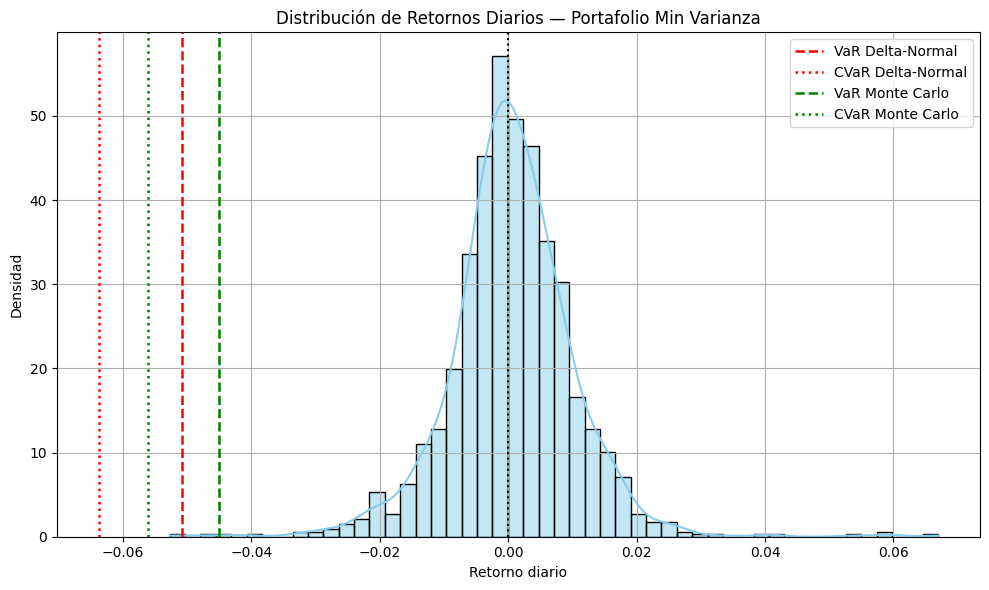

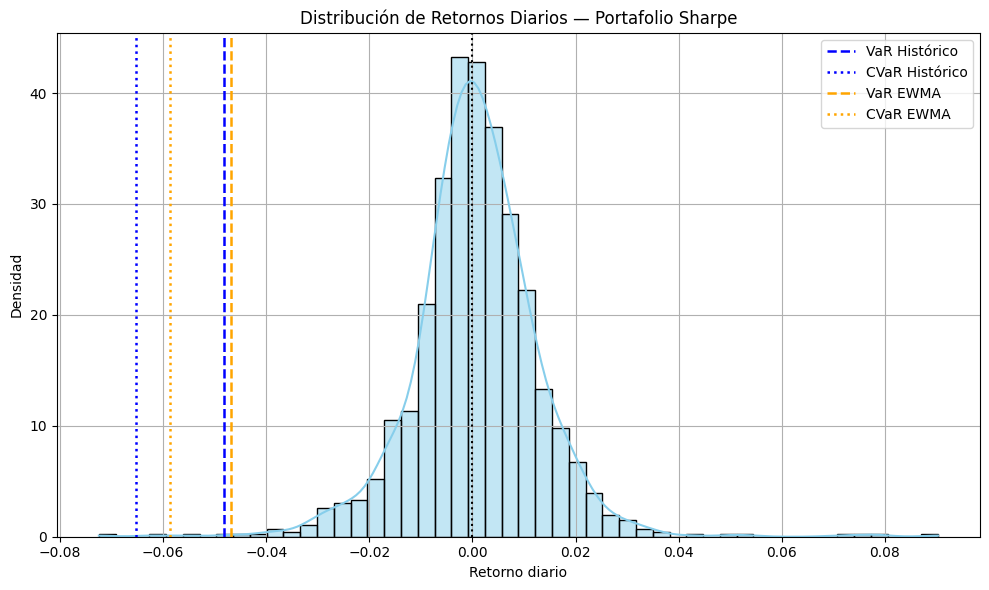

In [ ]:
def graficar_distribucion_filtrada(nombre_port, pesos, retornos,
                                   df_reg_ok,
                                   dfs_var_port,         # dict método -> df_var_<método>_port_pct
                                   df_cvar_port_pct=None,# df_cvar_port_pct con filas 'CVaR <método>'
                                   dibujar_cvar=True):
    # Métodos aprobados para este portafolio
    met_aprob = df_reg_ok.loc[df_reg_ok['Portafolio'] == nombre_port, 'Método'].unique()
    if len(met_aprob) == 0:
        print(f"No hay métodos aprobados para el portafolio {nombre_port}.")
        return

    # Colores por método (consistentes con tu bloque original)
    colores_metodo = {
        'Delta-Normal': 'red',
        'Histórico': 'blue',
        'Monte Carlo': 'green',
        'EWMA': 'orange',
        'GARCH': 'purple',
    }

    # Retornos diarios observados del portafolio
    ret_port = retornos @ pesos

    # Plot distribución
    plt.figure(figsize=(10, 6))
    sns.histplot(ret_port, bins=50, kde=True, color='skyblue', stat='density')
    plt.title(f"Distribución de Retornos Diarios — Portafolio {nombre_port}")
    plt.xlabel("Retorno diario")
    plt.ylabel("Densidad")

    # Líneas de VaR (y CVaR) solo para métodos aprobados
    for metodo in met_aprob:
        # 1) VaR del portafolio para este método
        df_var_port = dfs_var_port.get(metodo, None)
        if df_var_port is not None and (nombre_port in df_var_port.columns):
            # Usa .iloc[0] para acceder al primer (y único) valor de VaR Portafolio %
            try:
                var_pct = float(df_var_port.loc['VaR Portafolio %', nombre_port])
                var_val = -var_pct / 100.0
                plt.axvline(var_val, color=colores_metodo.get(metodo, 'red'),
                            linestyle='--', linewidth=1.8, label=f"VaR {metodo}")
            except Exception:
                pass

        # 2) (Opcional) CVaR del portafolio para este método
        if dibujar_cvar and (df_cvar_port_pct is not None) and (nombre_port in df_cvar_port_pct.columns):
            fila_cvar = f'CVaR {metodo}'
            if fila_cvar in df_cvar_port_pct.index:
                try:
                    cvar_pct = float(df_cvar_port_pct.loc[fila_cvar, nombre_port])
                    cvar_val = -cvar_pct / 100.0
                    plt.axvline(cvar_val, color=colores_metodo.get(metodo, 'red'),
                                linestyle=':', linewidth=1.8, label=f"CVaR {metodo}")
                except Exception:
                    pass

    plt.axvline(0, color='black', linestyle=':')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- Mapeo MÉTODO -> DF de VaR (portafolio %) que ya calculaste ---
dfs_var_port = {
    'Delta-Normal': df_var_portafolio_pct,   # índice: 'VaR Portafolio %'
    'Histórico':    df_var_hist_port_pct,
    'Monte Carlo':  df_var_mc_port_pct,
    'EWMA':         df_var_ewma_port_pct,
    'GARCH':        df_var_garch_port_pct,
}

# Dibujar SOLO para portafolios con al menos un método aprobado
# Asegúrate de que df_regulatorio_ok existe y no está vacío
if 'df_regulatorio_ok' not in globals() or df_regulatorio_ok.empty:
    print("No se puede generar la gráfica resumen. No hay modelos que pasen la validación regulatoria.")
else:
    ports_con_aprobados = df_regulatorio_ok['Portafolio'].unique()
    for nombre_port in ports_con_aprobados:
        pesos = portafolios[nombre_port]
        graficar_distribucion_filtrada(
            nombre_port=nombre_port,
            pesos=pesos,
            retornos=ret_activos,
            df_reg_ok=df_regulatorio_ok,
            dfs_var_port=dfs_var_port,
            df_cvar_port_pct=df_cvar_port_pct,  # si no quieres CVaR, pásalo como None o dibujar_cvar=False
            dibujar_cvar=True
        )

## 6. Backtesting

In [ ]:
from scipy.stats import chi2

# ---- utilidades de backtest ----
def generar_violaciones(retornos_portafolio, var_series_pos):
    return (retornos_portafolio < -var_series_pos).astype(int)

def test_kupiec(violaciones, alpha):
    n = len(violaciones)
    x = int(violaciones.sum())
    if n == 0:
        return np.nan
    pi = x / n
    pi0 = 1 - alpha
    # manejar casos extremos para evitar log(0)
    if pi == 0 or pi == 1:
        return np.nan
    LR_pof = -2 * (np.log((1 - pi0)**(n - x) * pi0**x) -
                   np.log((1 - pi)**(n - x) * pi**x))
    return 1 - chi2.cdf(LR_pof, df=1)

def test_christoffersen(violaciones):
    v = np.asarray(violaciones, dtype=int)
    if len(v) < 2:
        return np.nan
    n00 = n01 = n10 = n11 = 0
    for t in range(1, len(v)):
        prev, curr = v[t - 1], v[t]
        if prev == 0 and curr == 0: n00 += 1
        elif prev == 0 and curr == 1: n01 += 1
        elif prev == 1 and curr == 0: n10 += 1
        elif prev == 1 and curr == 1: n11 += 1
    # probabilidades de transición (con guardas)
    if (n00 + n01) == 0 or (n10 + n11) == 0 or (n00 + n01 + n10 + n11) == 0:
        return np.nan
    pi01 = n01 / (n00 + n01)
    pi11 = n11 / (n10 + n11)
    pi   = (n01 + n11) / (n00 + n01 + n10 + n11)
    # evitar log(0)
    eps = 1e-12
    logL_uncond = n00*np.log(max(1-pi,eps)) + (n01+n10+n11)*np.log(max(pi,eps))
    logL_cond   = (
        n00*np.log(max(1-pi01,eps)) + n01*np.log(max(pi01,eps)) +
        n10*np.log(max(1-pi11,eps)) + n11*np.log(max(pi11,eps))
    )
    LR_indep = -2 * (logL_uncond - logL_cond)
    return 1 - chi2.cdf(LR_indep, df=1)

# ---- funciones de VaR rolling por método (horizonte = 1 día para backtesting) ----
def var_rolling_historico(ret_activos, w, alpha, window=250):
    ret_port = ret_activos @ w
    vals = []
    for i in range(window, len(ret_port)):
        roll = ret_port.iloc[i-window:i]
        var_i = -np.percentile(roll, (1 - alpha) * 100)  # magnitud positiva
        vals.append(var_i)
    return ret_port.iloc[window:].values, np.array(vals)

def var_rolling_delta_normal(ret_activos, w, alpha, window=250):
    z = abs(norm.ppf(1 - alpha))
    ret_port = ret_activos @ w
    vals = []
    for i in range(window, len(ret_activos)):
        sub = ret_activos.iloc[i-window:i]
        cov = sub.cov().values
        port_vol = np.sqrt(np.dot(w, np.dot(cov, w)))
        var_i = z * port_vol  # magnitud positiva (1 día)
        vals.append(var_i)
    return ret_port.iloc[window:].values, np.array(vals)

def var_rolling_montecarlo(ret_activos, w, alpha, window=250, n_sim=20000):
    ret_port = ret_activos @ w
    vals = []

    for i in range(window, len(ret_activos)):
        sub = ret_activos.iloc[i-window:i]
        logrets = np.log1p(sub)

        mu   = logrets.mean().values
        sig  = logrets.std(ddof=1).values
        corr = np.corrcoef(logrets.T)

        # Guardas por estabilidad
        sig = np.where(sig <= 1e-8, 1e-8, sig)
        try:
            L = np.linalg.cholesky(corr)
        except np.linalg.LinAlgError:
            # pequeña regularización a la correlación si no es p.s.d.
            eps = 1e-6
            corr = (1 - eps) * corr + eps * np.eye(len(sig))
            L = np.linalg.cholesky(corr)

        # Simulaciones 1D
        Z = np.random.randn(n_sim, len(sig)) @ L.T
        logR = (mu - 0.5 * sig**2) * 1.0 + Z * sig * 1.0
        R = np.exp(logR) - 1.0
        port = R @ w

        var_i = -np.percentile(port, (1 - alpha) * 100.0)  # magnitud positiva
        vals.append(var_i)

    return ret_port.iloc[window:].values, np.array(vals)

def var_rolling_ewma(ret_activos, w, alpha, window=250, lam=lambda_):
    z = abs(norm.ppf(1 - alpha))
    ret_port = ret_activos @ w
    vals = []
    for i in range(window, len(ret_activos)):
        sub = ret_activos.iloc[i-window:i]
        # vol EWMA individual (último punto)
        vols = []
        for col in sub.columns:
            serie = sub[col].values
            var_t = np.var(serie[:5]) if len(serie)>=5 else np.var(serie)  # semilla
            for r in serie[1:]:
                var_t = lam*var_t + (1-lam)*(r**2)
            vols.append(np.sqrt(var_t))
        vols = np.array(vols)
        corr = np.corrcoef(sub.T)
        ewma_cov = np.outer(vols, vols) * corr
        port_vol = np.sqrt(np.dot(w, np.dot(ewma_cov, w)))
        vals.append(z * port_vol)
    return ret_port.iloc[window:].values, np.array(vals)

def var_rolling_garch(ret_activos, w, alpha, window=750):
    from arch import arch_model
    import warnings
    z = abs(norm.ppf(1 - alpha))
    ret_port = ret_activos @ w
    vals = []
    for i in range(window, len(ret_activos)):
        sub = ret_activos.iloc[i-window:i]
        sigmas = []
        for col in sub.columns:
            serie = (sub[col].values * 100.0)  # en %
            try:
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=UserWarning)
                    am = arch_model(serie, vol='GARCH', p=1, q=1, rescale=False)
                    res = am.fit(disp='off', show_warning=False)
                # pronóstico 1-step ahead de la varianza (en %^2)
                fcast = res.forecast(horizon=1, reindex=False)
                var_next = float(fcast.variance.values[-1, 0])      # %^2
                sigma_next = np.sqrt(var_next) / 100.0              # a proporción
                # sanity fallback
                if not np.isfinite(sigma_next) or sigma_next <= 0:
                    raise ValueError("sigma_next inválida")
            except Exception:
                sigma_next = float(np.std(serie, ddof=1) / 100.0)   # fallback: vol histórica
            sigmas.append(sigma_next)
        sigmas = np.array(sigmas)
        corr = np.corrcoef(sub.T)
        cov_garch = np.outer(sigmas, sigmas) * corr
        port_vol = np.sqrt(np.dot(w, np.dot(cov_garch, w)))
        vals.append(z * port_vol)
    return ret_port.iloc[window:].values, np.array(vals)

# Mapeo de método -> función rolling
rolling_funcs = {
    'Histórico':    var_rolling_historico,
    'Delta-Normal': var_rolling_delta_normal,
    'Monte Carlo':  var_rolling_montecarlo,
    'EWMA':         var_rolling_ewma,
    'GARCH':        var_rolling_garch,
}

# -------------------------------
# Ejecutar SOLO para df_regulatorio_ok
# -------------------------------
window_hist = 250     # ~1 año
window_dn   = 250
window_mc   = 250
window_ewma = 250
window_gch  = 250     # GARCH requiere más datos

ventanas = {
    'Histórico':    window_hist,
    'Delta-Normal': window_dn,
    'Monte Carlo':  window_mc,
    'EWMA':         window_ewma,
    'GARCH':        window_gch,
}

alpha_bt = confianza  # usar el mismo nivel que definiste

resultados_bt = []
errores_bt = []

# Asegura que tenemos df_regulatorio_ok construido (de tu validación)
if 'df_regulatorio_ok' not in globals():
    raise RuntimeError("df_regulatorio_ok no existe. Ejecuta primero la validación regulatoria.")

for _, fila in df_regulatorio_ok.iterrows():
    nombre_port = fila['Portafolio']
    metodo      = fila['Método']
    w           = portafolios[nombre_port]
    fun_roll    = rolling_funcs.get(metodo, None)
    if fun_roll is None:
        continue

    try:
        win = ventanas[metodo]
        # serie de retornos observados y serie de VaR pronosticado (magnitud positiva)
        ret_eval, var_series_pos = fun_roll(ret_activos, w, alpha_bt, window=win)
        # violaciones
        viol = generar_violaciones(ret_eval, var_series_pos)
        # tests
        p_k = test_kupiec(viol, alpha_bt)
        p_c = test_christoffersen(viol)

        resultados_bt.append({
            'Portafolio': nombre_port,
            'Método': metodo,
            'Observaciones': len(viol),
            'Violaciones': int(viol.sum()),
            'Tasa Observada': float(viol.mean()),
            'p-valor Kupiec': p_k,
            'p-valor Christoffersen': p_c
        })
    except Exception as e:
        errores_bt.append((nombre_port, metodo, str(e)))
        continue

df_backtest_ok = pd.DataFrame(resultados_bt).sort_values(['Portafolio','Método']).reset_index(drop=True)

print("Backtesting (solo modelos que pasaron regulación)")
display(df_backtest_ok)

if errores_bt:
    print("Modelos con error durante el backtesting:")
    for (p,m,err) in errores_bt:
        print(f" - {p} / {m}: {err}")

Backtesting (solo modelos que pasaron regulación)


,Portafolio,Método,Observaciones,Violaciones,Tasa Observada,p-valor Kupiec,p-valor Christoffersen
0,Min Varianza,Delta-Normal,1156,55,0.047578,0.703343,0.0
1,Min Varianza,Monte Carlo,1156,60,0.051903,0.767891,0.0
2,Sharpe,EWMA,1156,57,0.049308,0.913839,0.0
3,Sharpe,Histórico,1156,66,0.057093,0.278727,0.0


## 7. Stress Testing

In [ ]:
# Unir resultados de Kupiec y validación regulatoria
# Asegúrate de que df_backtest_ok existe y no está vacío
if 'df_backtest_ok' not in globals() or df_backtest_ok.empty:
    print("No se puede realizar Stress Testing. No hay modelos que pasen la validación regulatoria o el backtesting falló.")
else:
    df_kupiec_validado = df_backtest_ok.merge(
        df_regulatorio_ok[['Portafolio', 'Método']],
        on=['Portafolio', 'Método'],
        how='inner'
    )

    # Seleccionar el modelo con mayor p-valor
    if df_kupiec_validado.empty:
        raise ValueError("No hay modelos que pasen la validación regulatoria para stress testing.")

    mejor_modelo = df_kupiec_validado.sort_values('p-valor Kupiec', ascending=False).iloc[0]
    port_sel = mejor_modelo['Portafolio']
    metodo_sel = mejor_modelo['Método']

    print(f"Modelo seleccionado para Stress Testing: {port_sel} - {metodo_sel}")

    # Obtener el VaR del modelo seleccionado
    var_seleccionado_pct = resumen_pct.loc[f"VaR {metodo_sel}", port_sel]

    # Escenarios reales de stress testing
    escenarios = [
        {'nombre': 'Crisis 2008 (Lehman)', 'ini': '2008-09-15', 'fin': '2008-10-15'},
        {'nombre': 'COVID-19 Marzo 2020',   'ini': '2020-03-01', 'fin': '2020-03-31'},
        {'nombre': 'Invasión Ucrania 2022', 'ini': '2022-02-20', 'fin': '2022-03-10'},
        {'nombre': 'Caída Tech 2022',       'ini': '2022-12-01', 'fin': '2023-01-15'}
    ]

    # Calcular pérdidas y comparar con VaR
    resultados_stress = []
    # Asegúrate de usar ret_activos para el portafolio seleccionado
    ret_port_sel = ret_activos @ portafolios[port_sel]

    for esc in escenarios:
        fecha_ini, fecha_fin = esc['ini'], esc['fin']
        # Filtrar por rango de fechas
        ret_periodo = ret_port_sel.loc[fecha_ini:fecha_fin]

        if len(ret_periodo) == 0:
            print(f"No hay datos para {esc['nombre']} ({fecha_ini} a {fecha_fin}) en la serie.")
            continue

        # Calcular el retorno acumulado en el período
        perdida_pct = (ret_periodo + 1).prod() - 1
        perdida_pct *= 100  # a porcentaje
        perdida_usd = (perdida_pct / 100) * monto_invertido # a USD

        # Comparar con VaR (VaR es pérdida esperada, por eso usamos abs o lo comparamos con el negativo de la pérdida)
        # El VaR seleccionado ya está en magnitud positiva (%)
        supera_var = perdida_pct < -var_seleccionado_pct
        exceso_pp = abs(perdida_pct) - var_seleccionado_pct if supera_var else 0
        exceso_veces = (abs(perdida_pct) / var_seleccionado_pct) if supera_var and var_seleccionado_pct != 0 else 0 # Evitar división por cero

        resultados_stress.append({
            'Escenario': esc['nombre'],
            'Fecha Inicio': fecha_ini,
            'Fecha Fin': fecha_fin,
            'Pérdida %': perdida_pct,
            'Pérdida USD': perdida_usd,
            'VaR % (10D)': var_seleccionado_pct,
            'Supera VaR?': supera_var,
            'Exceso P.P.': exceso_pp,
            'Exceso Veces': exceso_veces
        })

    # Mostrar tabla final
    if resultados_stress:
        df_stress = pd.DataFrame(resultados_stress)
        print("Resultados de Stress Testing con eventos reales y comparación con VaR")
        display(df_stress.round(3))
    else:
        print("No se pudieron calcular resultados de Stress Testing para los escenarios definidos.")

Modelo seleccionado para Stress Testing: Sharpe - EWMA
No hay datos para Crisis 2008 (Lehman) (2008-09-15 a 2008-10-15) en la serie.
Resultados de Stress Testing con eventos reales y comparación con VaR


,Escenario,Fecha Inicio,Fecha Fin,Pérdida %,Pérdida USD,VaR % (10D),Supera VaR?,Exceso P.P.,Exceso Veces
0,COVID-19 Marzo 2020,2020-03-01,2020-03-31,-3.587,-3586.762,4.677,False,0.000,0.00
1,Invasión Ucrania 2022,2022-02-20,2022-03-10,-5.424,-5424.447,4.677,True,0.747,1.16
2,Caída Tech 2022,2022-12-01,2023-01-15,2.235,2234.648,4.677,False,0.000,0.00
